In [1]:
#Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#supress scientific notation of values
#pd.options.display.float_format = '{:.2f}'.format
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [3]:
#Loading data set file in to data frame.
file_path = 'loan.csv'
#using low memory flag to load columns with multiple data types.
data = pd.read_csv(file_path, low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
#shape of data frame
data.shape

(39717, 111)

In [5]:
data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [6]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
#Printing columns which have more than 0% missing values
null_perc[ null_perc > 0 ]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [7]:
#Removing columns which has more than 60% null values in it.
data.drop(null_perc[ null_perc > 60 ].index, axis=1, inplace=True)

In [8]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
#Printing columns which have more than 0% missing values
null_perc[ null_perc > 0 ]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [9]:
data.head(3).append(data.tail(3))

/var/folders/fj/4trbrrhn72b12j1r1vhm2g080000gn/T/ipykernel_19682/2740574424.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data.head(3).append(data.tail(3))


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.00,272.16,0.0,0.00,0.00,Apr-08,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.00,174.20,0.0,0.00,0.00,Jan-08,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,"I plan to consolidate over $7,000 of debt: a c...",debt_consolidation,Consolidation Loan,027xx,MA,14.29,1,Oct-03,0,7,0,4175,51.50%,8,f,0.0,0.0,9195.263334,980.83,7500.00,1695.26,0.0,0.00,0.00,Jun-10,256.59,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [10]:
#Finding the unique values of columns
data.nunique().sort_values().head(10)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
initial_list_status           1
collections_12_mths_ex_med    1
pymnt_plan                    1
term                          2
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [12]:
pd.value_counts(data.dtypes)

object     23
float64    18
int64      13
dtype: int64

In [13]:
#Dropping the columns with only 1 unique value because we are unlikely to gather any useful insights from them.
data = data.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan'],axis =1)

In [14]:
data.nunique().sort_values(ascending=False).head(10)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
desc               26527
revol_bal          21711
dtype: int64

In [15]:
data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [16]:
# Dropping few other columns because we are unlikely to gather any useful insights from them.
data = data.drop(['url','id','member_id','desc','emp_title','title','last_credit_pull_d','zip_code','last_pymnt_d','last_pymnt_amnt','inq_last_6mths','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee'],axis =1)

In [17]:
data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,3,0,13648,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,3,0,1687,9.40%,4,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,0,2956,98.50%,10,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,10,0,5598,21%,37,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,15,0,27783,53.90%,38,0.0


In [18]:
data.nunique().sort_values(ascending=False).head(10)

revol_bal           21711
installment         15383
funded_amnt_inv      8205
annual_inc           5318
dti                  2868
revol_util           1089
funded_amnt          1041
loan_amnt             885
earliest_cr_line      526
int_rate              371
dtype: int64

In [19]:
data.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [20]:
#Removing current loan status rows
data = data[data.loan_status != 'Current']

In [21]:
data.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [22]:
data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,3,0,13648,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,3,0,1687,9.40%,4,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,0,2956,98.50%,10,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,10,0,5598,21%,37,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,9,0,7963,28.30%,12,0.0


In [23]:
data.shape

(38577, 25)

In [24]:
data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [25]:
data.issue_d.unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [26]:
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')

In [27]:
data['issue_year'] = data['issue_d'].dt.year

In [28]:
data['issue_month'] = data['issue_d'].dt.month

In [29]:
data['issue_year'].unique()

array([2011, 2010, 2009, 2008, 2007])

In [30]:
data['issue_month'].unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [31]:
data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,Jan-85,3,0,13648,83.70%,9,0.0,2011,12
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,Apr-99,3,0,1687,9.40%,4,0.0,2011,12
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,Nov-01,2,0,2956,98.50%,10,0.0,2011,12
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,Feb-96,10,0,5598,21%,37,0.0,2011,12
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,Nov-04,9,0,7963,28.30%,12,0.0,2011,12


In [32]:
data['int_rate'] = data.int_rate.apply(lambda x : float(x.replace('%','')))

In [33]:
data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,Jan-85,3,0,13648,83.70%,9,0.0,2011,12
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,Apr-99,3,0,1687,9.40%,4,0.0,2011,12
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,Nov-01,2,0,2956,98.50%,10,0.0,2011,12
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,Feb-96,10,0,5598,21%,37,0.0,2011,12
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,Nov-04,9,0,7963,28.30%,12,0.0,2011,12


In [34]:
data.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [35]:
data['revol_util'] = data.revol_util.apply(lambda x : float(str(x).replace('%','')))

In [36]:
data.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line                object
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                     float64
total_acc                        int64
pub_rec_bankruptcies           float64
issue_year               

In [37]:
data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,Jan-85,3,0,13648,83.7,9,0.0,2011,12
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,Apr-99,3,0,1687,9.4,4,0.0,2011,12
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,Nov-01,2,0,2956,98.5,10,0.0,2011,12
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,Feb-96,10,0,5598,21.0,37,0.0,2011,12
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,Nov-04,9,0,7963,28.3,12,0.0,2011,12


In [38]:
data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')

In [39]:
data['earliest_cr_line_year'] = data['earliest_cr_line'].dt.year

In [40]:
data['earliest_cr_line_year'].unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1979, 1978, 1971, 1972, 1970,
       1969, 1975, 1982, 1976, 1977, 2062, 1973, 2068, 1974, 2067, 2065,
       2063, 2054, 2066, 2064, 2059, 2056, 2046, 2050, 2061])

In [41]:
data['earliest_cr_line_month'] = data['earliest_cr_line'].dt.month

In [42]:
data['earliest_cr_line_month'].unique()

array([ 1,  4, 11,  2,  7,  9, 10,  5,  8,  6, 12,  3])

In [43]:
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2011 else x)

In [44]:
data['earliest_cr_line']

0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
5       2004-11-01
           ...    
39712   1990-11-01
39713   1986-12-01
39714   1998-10-01
39715   1988-11-01
39716   2003-10-01
Name: earliest_cr_line, Length: 38577, dtype: datetime64[ns]

In [45]:
data['earliest_cr_line_year'] = data['earliest_cr_line'].dt.year

In [46]:
data['earliest_cr_line_year'].unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1979, 1978, 1971, 1972, 1970,
       1969, 1975, 1982, 1976, 1977, 1962, 1973, 1968, 1974, 1967, 1965,
       1963, 1954, 1966, 1964, 1959, 1956, 1946, 1950, 1961])

In [47]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_year,earliest_cr_line_month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,3,0,13648,83.7,9,0.0,2011,12,1985,1
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,3,0,1687,9.4,4,0.0,2011,12,1999,4
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,0,2956,98.5,10,0.0,2011,12,2001,11
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,10,0,5598,21.0,37,0.0,2011,12,1996,2
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,9,0,7963,28.3,12,0.0,2011,12,2004,11


In [48]:
data = data.drop(['issue_d','earliest_cr_line'],axis =1)

In [49]:
data['inv_approved_loan_amnt_perc'] = round(data.funded_amnt_inv*100/data.loan_amnt,2)

In [50]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

emp_length              2.68
revol_util              0.13
pub_rec_bankruptcies    1.81
dtype: float64

In [51]:
data[data['emp_length'].isnull()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_year,earliest_cr_line_month,inv_approved_loan_amnt_perc
168,2500,2500,2500.00000,36 months,7.51,77.78,A,A3,NaN,OWN,12000.0,Source Verified,Charged Off,debt_consolidation,CA,16.30,0,13,0,4853,42.2,20,0.0,2011,12,1994,8,100.00
323,18000,18000,18000.00000,60 months,17.58,452.98,D,D4,NaN,MORTGAGE,60000.0,Verified,Fully Paid,debt_consolidation,AL,21.96,0,11,0,5945,83.7,28,0.0,2011,12,2003,3,100.00
394,4000,4000,4000.00000,36 months,11.71,132.31,B,B3,NaN,RENT,24000.0,Source Verified,Fully Paid,home_improvement,FL,7.50,1,4,0,1593,54.9,6,0.0,2011,12,2005,2,100.00
422,1000,1000,1000.00000,36 months,14.65,34.50,C,C3,NaN,RENT,18408.0,Not Verified,Charged Off,major_purchase,NJ,6.00,0,3,1,2510,83.7,8,1.0,2011,12,1993,4,100.00
439,8250,8250,8250.00000,36 months,7.51,256.67,A,A3,NaN,MORTGAGE,31500.0,Verified,Fully Paid,debt_consolidation,MD,17.87,0,17,0,7521,10.4,37,0.0,2011,12,1981,12,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32591,10000,10000,9975.00000,36 months,14.22,342.85,C,C5,NaN,RENT,45000.0,Not Verified,Fully Paid,small_business,PA,4.51,0,9,0,9696,66.4,17,0.0,2010,1,2000,9,99.75
32608,3700,3700,3700.00000,36 months,14.22,126.86,C,C5,NaN,RENT,17496.8,Not Verified,Fully Paid,other,TX,3.36,0,2,0,1605,45.9,5,0.0,2010,1,2006,8,100.00
32621,10000,10000,9731.17513,36 months,14.22,342.85,C,C5,NaN,MORTGAGE,36000.0,Not Verified,Charged Off,other,MA,3.83,2,3,0,344,34.4,19,0.0,2010,1,2000,4,97.31
32631,6000,6000,6000.00000,36 months,12.73,201.40,C,C1,NaN,MORTGAGE,60000.0,Not Verified,Fully Paid,moving,MN,12.80,0,7,1,7088,63.3,12,0.0,2010,1,2001,10,100.00


In [52]:
data[data['revol_util'].isnull()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_year,earliest_cr_line_month,inv_approved_loan_amnt_perc
3565,8000,8000,8000.000000,36 months,19.42,294.95,E,E3,3 years,RENT,30000.0,Source Verified,Fully Paid,debt_consolidation,IL,18.56,0,6,0,0,NaN,10,0.0,2011,11,1992,9,100.00
4714,6100,6100,6100.000000,36 months,14.27,209.29,C,C2,NaN,MORTGAGE,23748.0,Verified,Charged Off,home_improvement,MO,23.95,0,2,0,0,NaN,4,0.0,2011,11,2002,5,100.00
4943,7200,7200,7200.000000,36 months,14.27,247.03,C,C2,7 years,RENT,48000.0,Not Verified,Fully Paid,debt_consolidation,CA,15.28,0,2,0,0,NaN,25,0.0,2011,10,1997,3,100.00
11282,5000,5000,5000.000000,36 months,21.36,189.31,F,F4,NaN,MORTGAGE,35000.0,Not Verified,Fully Paid,home_improvement,WA,21.91,0,2,0,0,NaN,5,0.0,2011,7,2007,12,100.00
12042,3000,3000,3000.000000,60 months,22.11,83.05,G,G1,6 years,OWN,17652.0,Source Verified,Charged Off,other,MN,0.00,0,3,0,0,NaN,5,0.0,2011,7,2008,1,100.00
12147,4275,4275,4275.000000,36 months,15.99,150.28,D,D2,7 years,MORTGAGE,54500.0,Not Verified,Fully Paid,home_improvement,NC,7.49,0,2,0,0,NaN,9,0.0,2011,7,2005,6,100.00
13891,2000,2000,1900.000000,36 months,18.39,72.70,E,E2,1 year,RENT,24000.0,Not Verified,Charged Off,other,AZ,22.60,0,3,0,0,NaN,16,0.0,2011,6,2006,5,95.00
17985,20000,20000,4575.003440,60 months,20.48,535.24,G,G2,10+ years,RENT,42000.0,Verified,Charged Off,debt_consolidation,OH,18.91,0,3,0,0,NaN,18,0.0,2011,3,1996,10,22.88
18184,1825,1825,1825.000000,36 months,12.68,61.22,C,C1,< 1 year,RENT,19200.0,Not Verified,Fully Paid,major_purchase,CA,16.81,0,7,0,0,NaN,11,0.0,2011,3,2006,11,100.00
21604,2500,2500,2500.000000,36 months,16.69,88.75,E,E3,7 years,RENT,27024.0,Verified,Fully Paid,debt_consolidation,CA,5.24,1,2,0,0,NaN,3,0.0,2010,12,2006,1,100.00


In [53]:
data[data['pub_rec_bankruptcies'].isnull()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_year,earliest_cr_line_month,inv_approved_loan_amnt_perc
35006,15000,15000,14875.000000,36 months,8.94,476.58,A,A5,< 1 year,MORTGAGE,110000.0,Not Verified,Fully Paid,credit_card,NY,7.07,0,6,0,7586,52.7,19,NaN,2009,9,1991,11,99.17
35058,3000,3000,2988.236621,36 months,14.26,102.92,C,C5,3 years,MORTGAGE,80800.0,Not Verified,Fully Paid,credit_card,TX,14.97,1,13,0,4740,39.5,23,NaN,2009,9,1998,7,99.61
35362,4000,4000,3892.258856,36 months,11.14,131.22,B,B1,< 1 year,MORTGAGE,60000.0,Not Verified,Charged Off,car,MI,11.08,0,14,0,24220,68.6,33,NaN,2009,8,1995,8,97.31
38443,2300,2300,589.605658,36 months,13.17,77.69,D,D2,10+ years,RENT,37152.0,Verified,Fully Paid,moving,NJ,2.26,0,4,0,2211,88.4,13,NaN,2008,8,1997,12,25.64
38717,6000,6000,500.000000,36 months,8.00,188.02,A,A3,< 1 year,MORTGAGE,75000.0,Not Verified,Fully Paid,other,OH,16.08,0,16,0,29797,23.2,39,NaN,2008,5,1994,12,8.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.000000,36 months,8.07,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Fully Paid,home_improvement,CO,11.33,0,13,0,7274,13.1,40,NaN,2007,7,1990,11,43.00
39713,8500,8500,875.000000,36 months,10.28,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Fully Paid,credit_card,NC,6.40,1,6,0,8847,26.9,9,NaN,2007,7,1986,12,10.29
39714,5000,5000,1325.000000,36 months,8.07,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,11,0,9698,19.4,20,NaN,2007,7,1998,10,26.50
39715,5000,5000,650.000000,36 months,7.43,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Fully Paid,other,MD,3.72,0,17,0,85607,0.7,26,NaN,2007,7,1988,11,13.00


In [54]:
# Imputing 0 for missing pub_rec_bankruptcies
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(0)
data.pub_rec_bankruptcies.isna().sum()

0

In [55]:
# Dropping rows with null values for revol_util
data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
data.revol_util.isna().sum()

0

In [56]:
# Dropping rows with null values for emp_length
data.dropna(axis = 0, subset = ['emp_length'] , inplace = True)
data.emp_length.isna().sum()

0

# Univariate Analysis

### LOAN AMOUNT

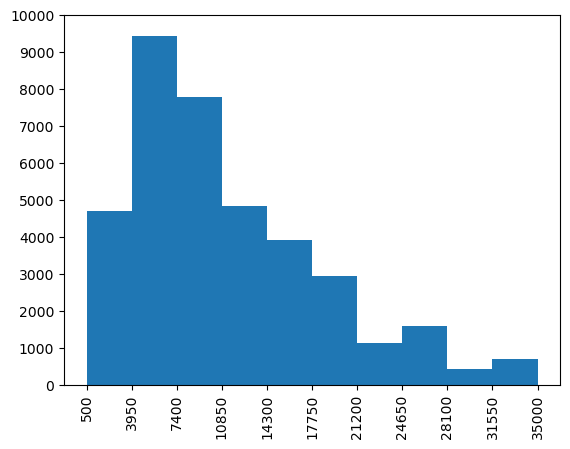

In [57]:
plt.hist(data.loan_amnt)
x_ticks = np.arange(500, 38450, 3450)
#x_ticks = np.arange(500, 40000, 5000)
labels = [i for i in x_ticks]
plt.xticks(x_ticks, labels)
plt.xticks(rotation=90)

y_ticks = np.arange(0, 11000, 1000)
labels = [i for i in y_ticks]
plt.yticks(y_ticks, labels)

plt.show()

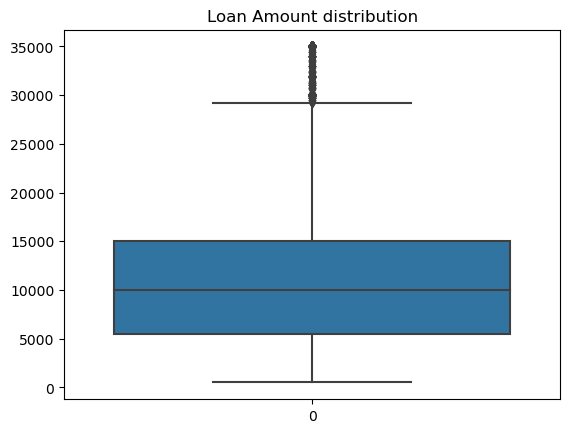

In [58]:
#Box plot
sns.boxplot(data=data.loan_amnt)
#Single title for both subplots.
plt.title('Loan Amount distribution')
plt.show()

In [59]:
data.loan_amnt.describe()

count    37497.000000
mean     11127.362856
std       7353.972102
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

### PERCENTAGE OF LOAN AMOUNT BY INVESTORS

In [60]:
data.inv_approved_loan_amnt_perc.describe()

count    37497.000000
mean        93.679231
std         17.493210
min          0.000000
25%         98.210000
50%         99.920000
75%        100.000000
max        100.000000
Name: inv_approved_loan_amnt_perc, dtype: float64

### TERM

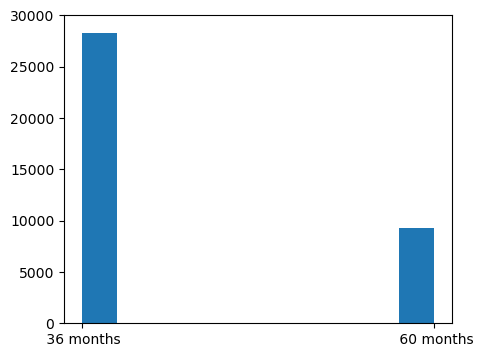

In [61]:
#Increasing the figure size of plot
plt.figure(figsize=(5,4))

plt.hist(data.term)
y_ticks = np.arange(0, 35000, 5000)
#ticks = np.arange(0, 35000, 5000)
labels = [i for i in y_ticks]
plt.yticks(y_ticks, labels)
plt.show()

### INTEREST RATE

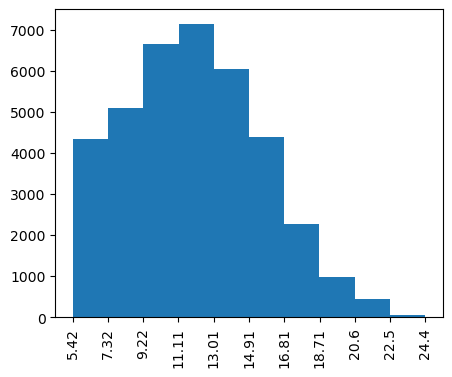

In [62]:
#Increasing the figure size of plot
plt.figure(figsize=(5,4))

plt.hist(data.int_rate)
x_ticks = np.arange(5.42, 26.29, 1.898)
x_ticks_f = []
for x in x_ticks:
     x_ticks_f.append(round(x,2))

labels = [i for i in x_ticks_f]
plt.xticks(x_ticks_f, labels)
plt.xticks(rotation=90)
plt.show()

/Users/amritasingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


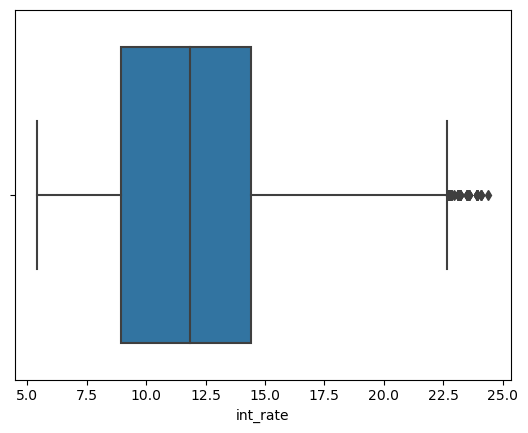

In [63]:
sns.boxplot(data.int_rate)
plt.show()

### INSTALLMENT AMOUNT

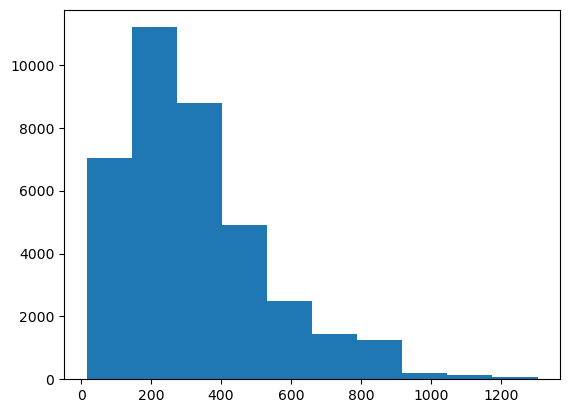

In [64]:
plt.hist(x=data.installment)
plt.show()

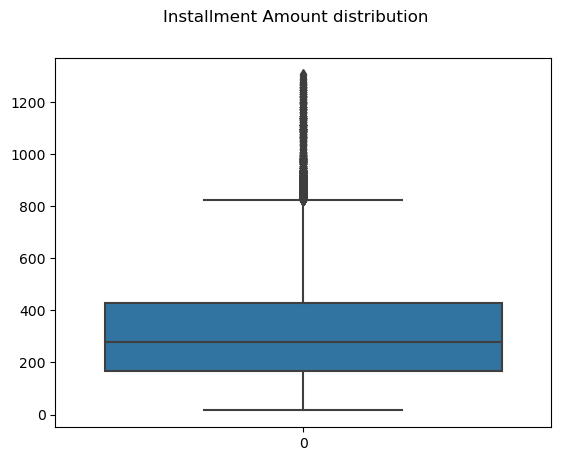

In [65]:
sns.boxplot(data=data.installment)
plt.suptitle('Installment Amount distribution')
plt.show()

### SUBGRADE

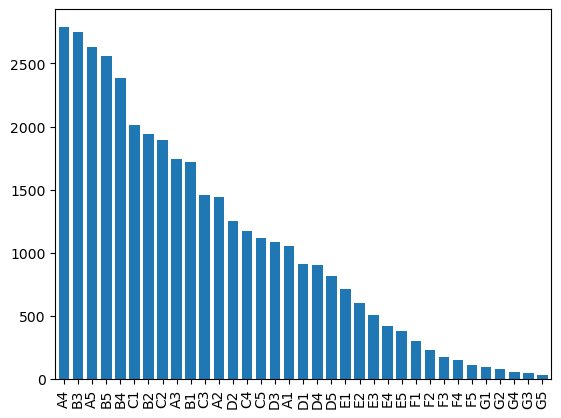

In [66]:
data.sub_grade.value_counts().plot.bar(width=.75)
plt.xticks(rotation=90)
plt.show()

### EMPLOYMENT LENGTH

In [67]:
data.emp_length.value_counts()

10+ years    8487
< 1 year     4496
2 years      4286
3 years      4008
4 years      3335
5 years      3190
1 year       3163
6 years      2165
7 years      1708
8 years      1433
9 years      1226
Name: emp_length, dtype: int64

### HOME OWNERSHIP

In [68]:
data.home_ownership.value_counts()

RENT        18047
MORTGAGE    16586
OWN          2765
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

### Annual Income

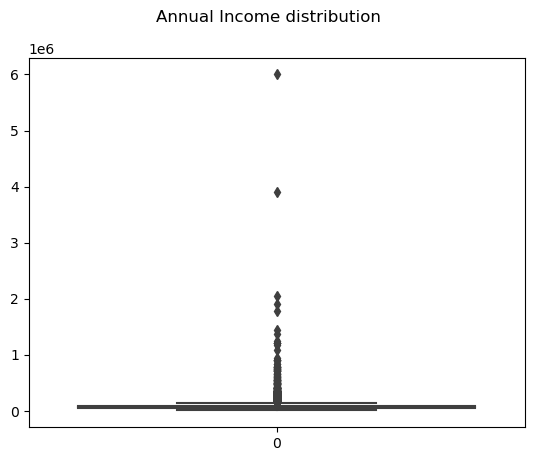

In [69]:
sns.boxplot(data=data.annual_inc)
plt.suptitle('Annual Income distribution')
plt.show()

# BIVARIATE ANALYSIS

In [70]:
data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_year,earliest_cr_line_month,inv_approved_loan_amnt_perc
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,3,0,13648,83.7,9,0.0,2011,12,1985,1,99.5
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,3,0,1687,9.4,4,0.0,2011,12,1999,4,100.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2,0,2956,98.5,10,0.0,2011,12,2001,11,100.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,10,0,5598,21.0,37,0.0,2011,12,1996,2,100.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,9,0,7963,28.3,12,0.0,2011,12,2004,11,100.0


Text(0.5, 1.0, 'Terms vs Loan Status')

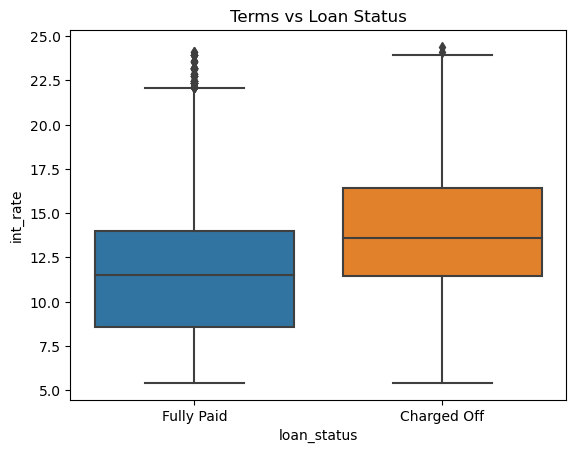

In [71]:
### INTEREST RATE VS LOAN STATUS

sns.boxplot(x=data.loan_status, y=data.int_rate, data=data)
plt.title('Terms vs Loan Status')

Text(0.5, 1.0, 'Terms vs Loan Status')

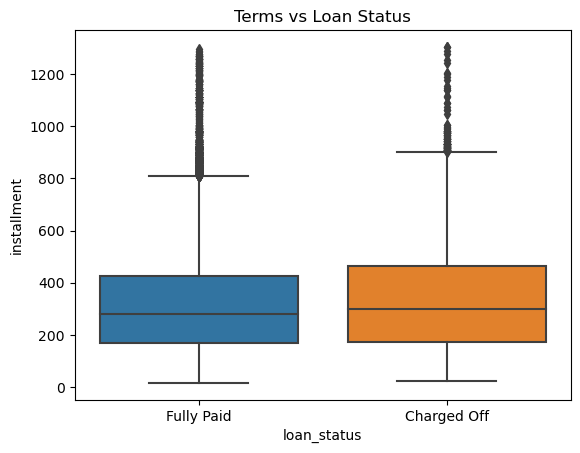

In [72]:
### INSTALLEMENT VS LOAN STATUS

sns.boxplot(x=data.loan_status, y=data.installment, data=data)
plt.title('Terms vs Loan Status')

Text(0.5, 1.0, 'Terms vs Loan Status')

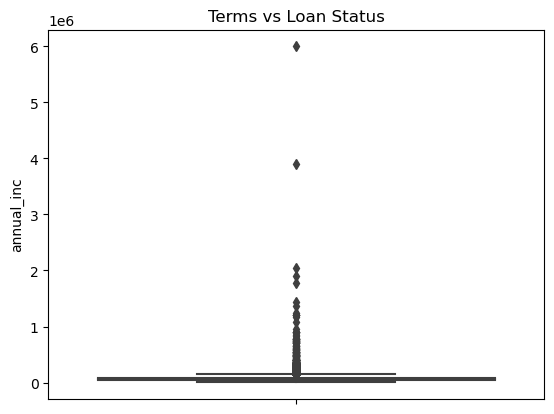

In [73]:
### ANNUAL INCOME
sns.boxplot(y=data.annual_inc, data=data)
plt.title('Terms vs Loan Status')

In [74]:
data.annual_inc.describe()

count    3.749700e+04
mean     6.943653e+04
std      6.467208e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

IQR:  42000.0


Text(0.5, 1.0, 'Terms vs Loan Status')

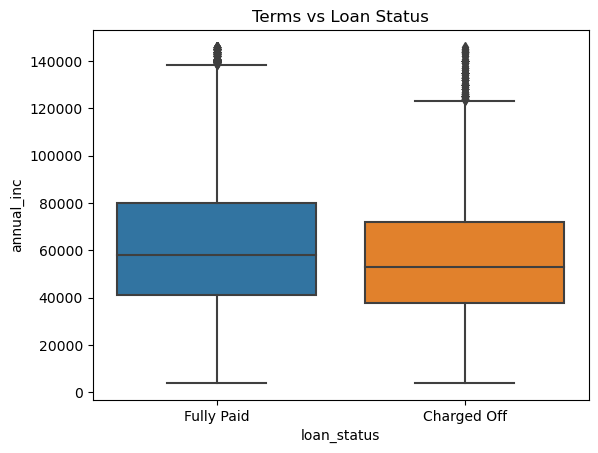

In [75]:
Q1 = data['annual_inc'].quantile(0.25)
Q3 = data['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
print("IQR: ", IQR)

# Remove Outliers
data1 = data[~((data['annual_inc'] < (Q1 - 1.5 * IQR)) |(data['annual_inc'] > (Q3 + 1.5 * IQR)))]

# Plot data1
sns.boxplot(x=data1.loan_status,y=data1.annual_inc, data=data1)
plt.title('Terms vs Loan Status')

Text(0.5, 1.0, 'Terms vs Loan Status')

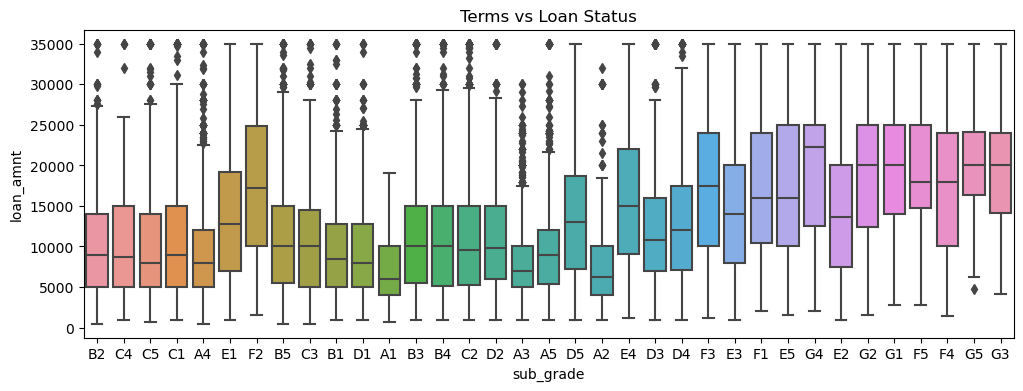

In [78]:
# Plot data1
plt.figure(figsize=(12,4))
sns.boxplot(x=data1.sub_grade,y=data1.loan_amnt, data=data1)
plt.title('Terms vs Loan Status')